# Хабибулин Марат МПИ-20-4-2
# Лабораторная работа №1

In [68]:
%matplotlib notebook
from numpy import heaviside
from numpy.random import rand, randint
from tqdm import tqdm_notebook as tqdm
sns.set_style('whitegrid')

In [55]:
import pandas as pd
import numpy as np
import copy

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

<img src ='1.png'>

Датасет №2: цифры от 0 до 9
    + Количество аттрибутов 15
    + Количество классов 10
Каждая цифра закодирована 15 клетками , также имеется ее зашумленный вариант.
Обучение будет производиться на незашумленных входных данных, тестирование на зашумленных.
Алгоритм обучения смотри ниже.

<IPython.core.display.Javascript object>


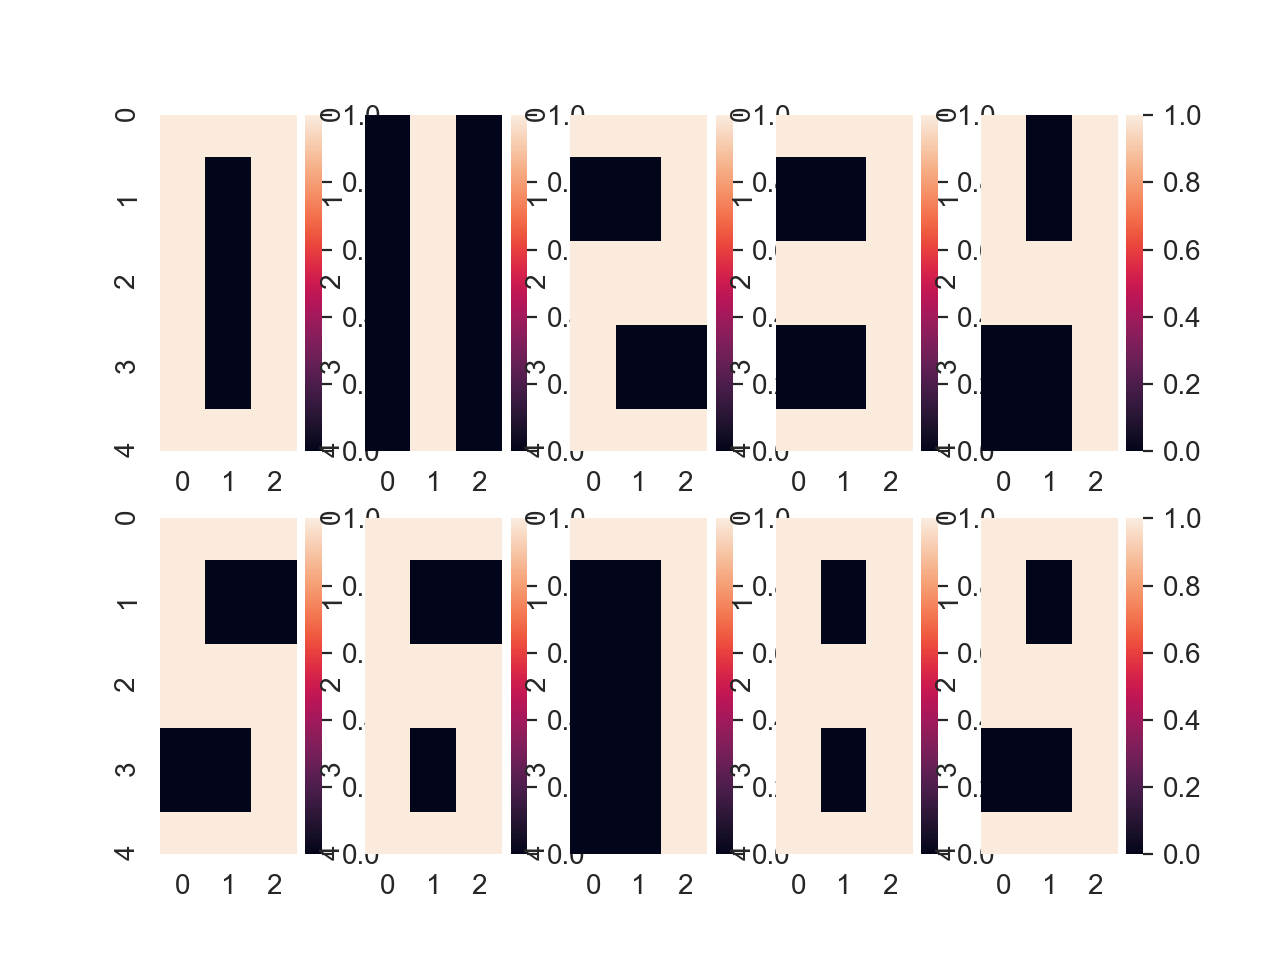

<IPython.core.display.Javascript object>


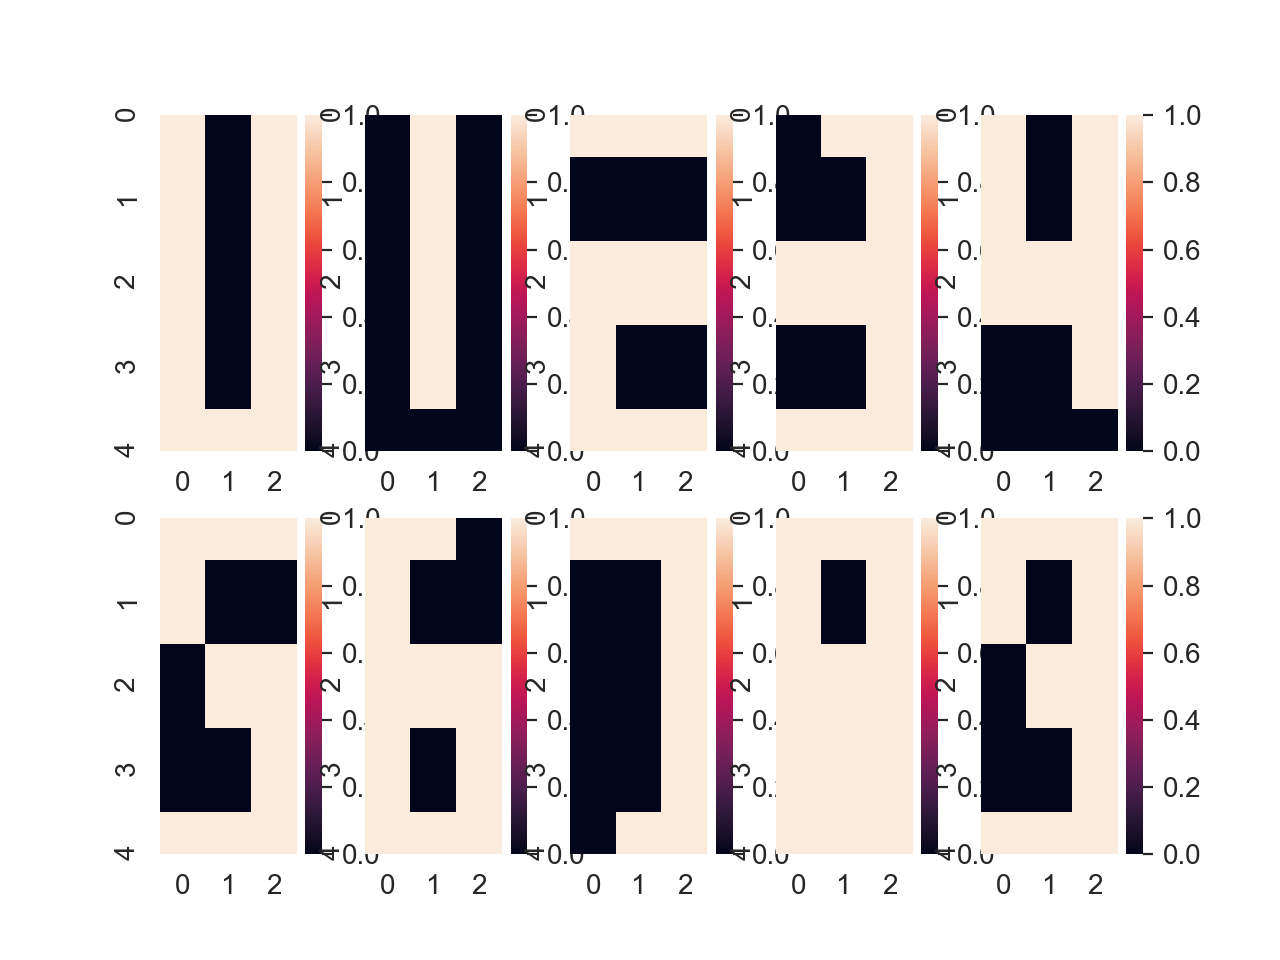

In [203]:
digits = np.array([[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1],
          [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
          [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
          [1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
          [1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1],
          [1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1],
          [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1],
          [1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
          [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
          [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]])

b_digits = digits.copy()
for i in range(10):
    l = randint(0,15)
    b_digits[i][l] = not b_digits[i][l]

pos_labels = np.arange(0,10,1)
bin_labels = np.array([ [0, 0, 0, 0], 
                        [0, 0, 0, 1],
                        [0, 0, 1, 0],
                        [0, 0, 1, 1],
                        [0, 1, 0, 0],
                        [0, 1, 0, 1],
                        [0, 1, 1, 0],
                        [0, 1, 1, 1],
                        [1, 0, 0, 0],
                        [1, 0, 0, 1],
                        [1, 0, 1, 0]])

fig = plt.figure()
for i, t in enumerate(digits):
    ax = fig.add_subplot(2,5,(i+1))
    sns.heatmap(t.reshape(5,3), ax=ax)

fig = plt.figure()
for i, t in enumerate(b_digits):
    ax = fig.add_subplot(2,5,(i+1))
    sns.heatmap(t.reshape(5,3), ax=ax)

In [495]:
digits_y = []
for i in range(10):
    tmp = np.zeros(10)
    tmp[i]=1
    digits_y.append(tmp)

Создание датасета для тестирования:

In [499]:
Dataset=[]
Label=[]
Label1=[]
for i in range(300):
    n = randint(0,10)
    tmp = np.zeros(10)
    tmp[n]=1
    Label.append(tmp)
    Label1.append(n)
    a=b_digits[n].copy()
    m = randint(0,20)
    if (m<15):
         a[m] = not a[m] # зашумляем входные данные
    Dataset.append(a) 

Тестирование датасета и приведение позиционного кодирования к численным значениям.

In [461]:
Accuracy_score=[]
Number_epoch=[]
for j in tqdm(range(17)):
    epoch = 0
    idx = np.array(list(range(10)))
    p1 = OneLayerPerceptron(15, 10, 10, digits)
    while epoch<=j:
        np.random.shuffle(idx)
        for t in idx:
            p1(digits[t], [t], True)
        acc = 0
        for t in idx:
            tmp = np.zeros(10)
            tmp[t] = 1
            acc += (p1(digits[t], [t], False) == tmp).all()
        if acc == 10:
            break
        epoch += 1
        
    Dataset_1=[]
    for i in Dataset:
        k=p1.predict(i)
        Dataset_1.append(k)
    Accuracy_score.append(accuracy_score(Dataset_1, Label1))
    Number_epoch.append(j)

Строим график зависимости Accuracy score от количесва эпох обучения чтобы найти точку переобучения

<IPython.core.display.Javascript object>


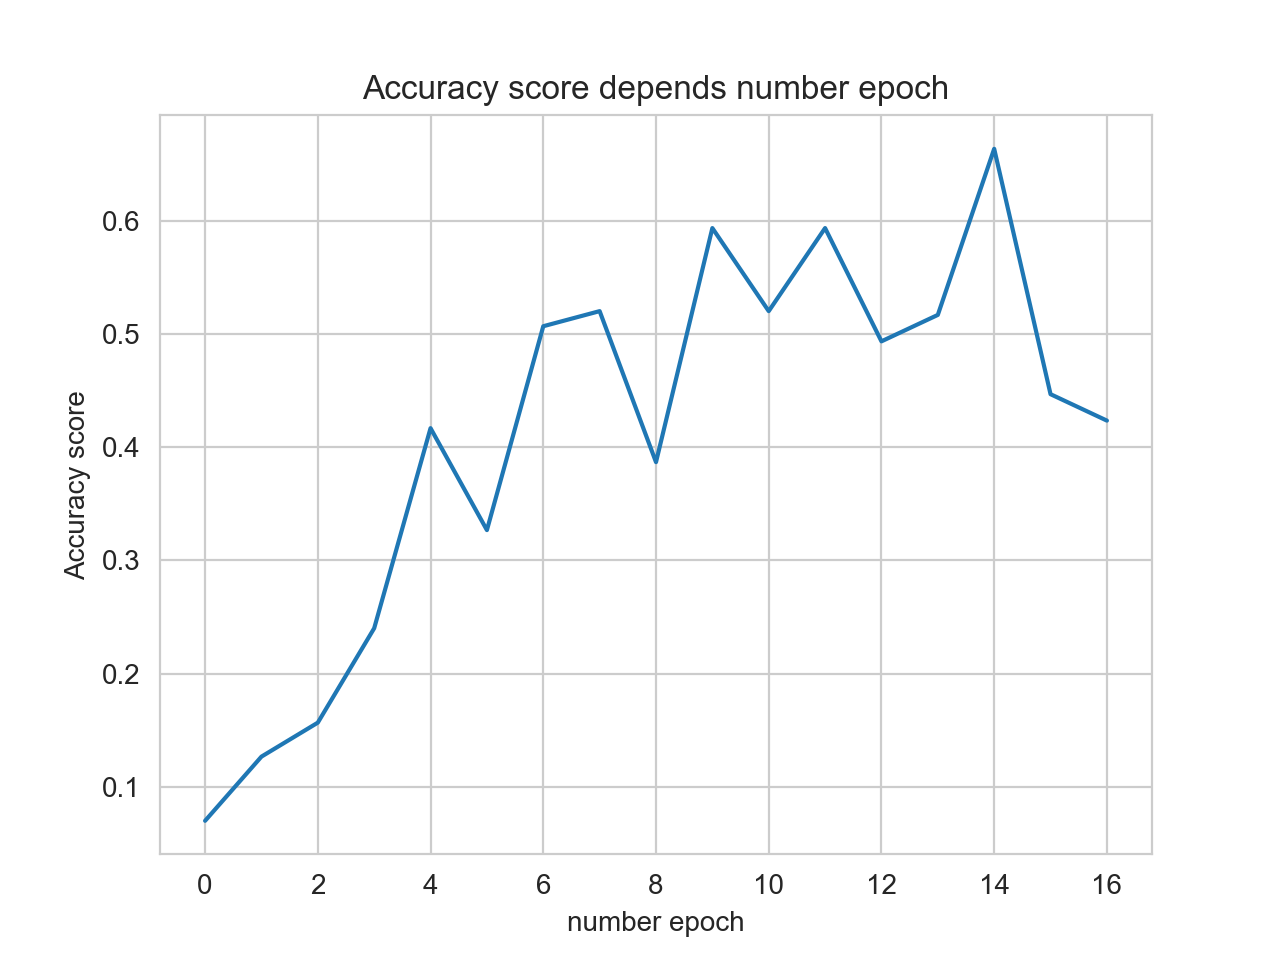

In [485]:
plt.figure()

plt.title('Accuracy score depends number epoch')
plt.xlabel('number epoch')
plt.ylabel('Accuracy score')
plt.plot(Number_epoch,Accuracy_score)

<IPython.core.display.Javascript object>


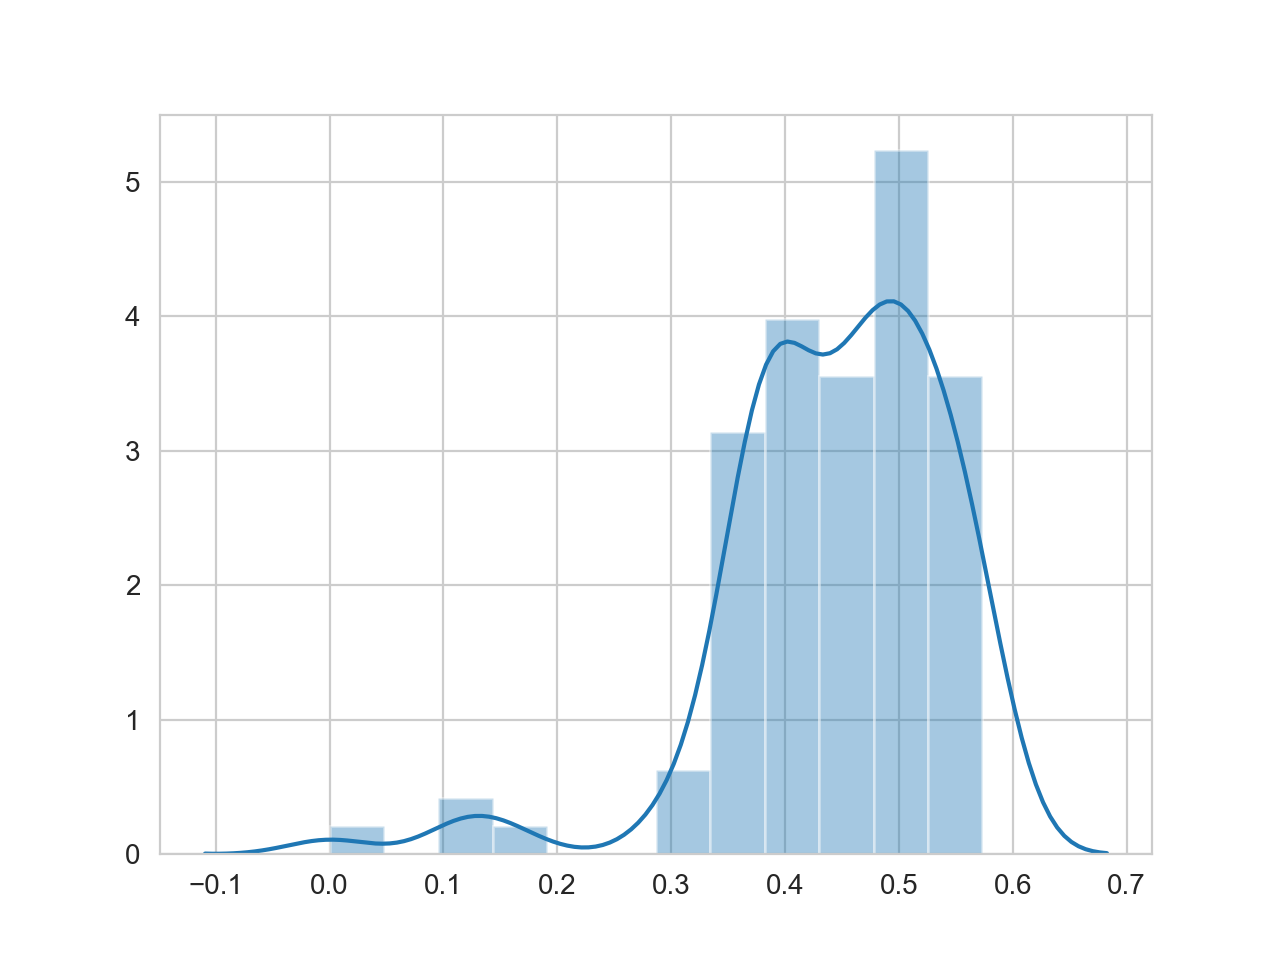

In [430]:
plt.figure()
sns.distplot(Accuracy_score)

Очевидно что переобучение наступает на 15й эпохе поэтому остановимся на 14той.

In [ ]:
epoch = 0
idx = np.array(list(range(10)))
p1 = OneLayerPerceptron(15, 10, 10, digits)
while epoch<=14:
    np.random.shuffle(idx)
    for t in idx:
        p1(digits[t], [t], True)
    acc = 0
    for t in idx:
        tmp = np.zeros(10)
        tmp[t] = 1
        acc += (p1(digits[t], [t], False) == tmp).all()
    if acc == 10:
        break
    epoch += 1

In [ ]:
Dataset_1=[]
    for i in Dataset:
        k=p1.predict(i)
        Dataset_1.append(k)

In [486]:
print("Accuracy score:", accuracy_score(Dataset_1, Label1))

Accuracy score: 0.6666666666666666


In [490]:
report = classification_report(Label1, Dataset_1, target_names=['0', '1','2','3','4','5','6','7','8','9','FAIL'])
print(report)

              precision    recall  f1-score   support

           0       0.76      0.88      0.82        33
           1       0.94      0.94      0.94        34
           2       0.70      0.70      0.70        27
           3       0.81      0.71      0.76        31
           4       0.25      0.06      0.10        33
           5       0.79      0.83      0.81        23
           6       0.53      0.45      0.49        20
           7       0.49      0.70      0.58        43
           8       0.95      0.58      0.72        33
           9       0.76      0.83      0.79        23
        FAIL       0.00      0.00      0.00         0

    accuracy                           0.67       300
   macro avg       0.64      0.61      0.61       300
weighted avg       0.69      0.67      0.67       300



/Users/M/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Датасет №2:Car Evaluation Data Set https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

Attribute Information:

Class Values: 

unacc, acc, good, vgood 

Attributes: 

* buying: vhigh, high, med, low
* maint: vhigh, high, med, low. 
* doors: 2, 3, 4, 5more. 
* persons: 2, 4, more. 
* lug_boot: small, med, big. 
* safety: low, med, high. 

# Обработка датасета, приведение к численным значениям

In [30]:
col_names = ['buying','maint','doors', 'persons', 'lug_boot', 'safety','class']

In [44]:
df = pd.read_csv("/Users/M/Desktop/lab_1/car.data", names=col_names)

In [45]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [46]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,5more,2,big,high,unacc
freq,432,432,432,576,576,576,1210


In [47]:
df.shape

(1728, 7)

In [48]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [49]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [50]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [51]:
buying_label = { ni: n for n, ni in enumerate(set(df['buying']))}
maint_label = { ni: n for n, ni in enumerate(set(df['maint']))}
doors_label = { ni: n for n, ni in enumerate(set(df['doors']))}
persons_label = { ni: n for n, ni in enumerate(set(df['persons']))}
lug_boot_label = { ni: n for n, ni in enumerate(set(df['lug_boot']))}
safety_label = { ni: n for n, ni in enumerate(set(df['safety']))}
class_label = { ni: n for n, ni in enumerate(set(df['class']))}

In [52]:
buying_label

{'vhigh': 0, 'med': 1, 'low': 2, 'high': 3}

In [56]:
df1 = copy.deepcopy(df)

In [57]:
df1['buying'] = df1['buying'].map(buying_label)
df1['maint'] = df1['maint'].map(maint_label)
df1['doors'] = df1['doors'].map(doors_label)
df1['persons'] = df1['persons'].map(persons_label)
df1['lug_boot'] = df1['lug_boot'].map(lug_boot_label)
df1['safety'] = df1['safety'].map(safety_label)
df1['class'] = df1['class'].map(class_label)

In [58]:
df1.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,1,0,1,3
1,0,0,0,1,0,0,3
2,0,0,0,1,0,2,3
3,0,0,0,1,1,1,3
4,0,0,0,1,1,0,3


In [59]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [61]:
df1.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
class       int64
dtype: object

In [64]:
df1.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.585069
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.740700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,2.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,3.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,3.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [65]:
Xfeatures = df1[['buying','maint','doors', 'persons', 'lug_boot', 'safety']]
Ylabels = df1['class']

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(Xfeatures, Ylabels, test_size=0.30, random_state=7)

# Линейный классификатор
Логистическая регрессия является линейным классификатором

In [83]:
logit = LogisticRegression()
logit.fit(X_train, Y_train)

/Users/M/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/M/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [492]:
print("Accuracy score:", accuracy_score(Y_test, logit.predict(X_test)))

Accuracy score: 0.6994219653179191


In [133]:
print("Recall score:", recall_score(Y_test, logit.predict(X_test),average='macro'))

Recall score: 0.25


In [158]:
print("F1_score:", f1_score(Y_test, logit.predict(X_test),average='macro'))

F1_score: 0.20578231292517007


/Users/M/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [165]:
report = classification_report(Y_test, logit.predict(X_test), target_names=['unacc', 'acc','good','vgood'])
print(report)

              precision    recall  f1-score   support

       unacc       0.00      0.00      0.00        27
         acc       0.00      0.00      0.00        17
        good       0.00      0.00      0.00       112
       vgood       0.70      1.00      0.82       363

    accuracy                           0.70       519
   macro avg       0.17      0.25      0.21       519
weighted avg       0.49      0.70      0.58       519



/Users/M/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Однослойный Перцептрон

In [124]:
nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,), random_state=1)
nn_clf.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Результаты

Параметры однослойного Перцептрона: 
+ количество нейронов в скрытом слое:10
+ функции активации:'relu'
+ Обновление весов: квазиньютоновский метод

In [125]:
print("Accuracy Score:" ,accuracy_score(Y_test, nn_clf.predict(X_test)))

Accuracy Score: 0.9132947976878613


Результат классификации у однослойного Перцептрона(а именно метрика accuracy или доля правильных ответов) на 0.21 лучше чем у линейного классификатора

In [138]:
print("Recall score:", recall_score(Y_test, nn_clf.predict(X_test),average='macro'))

Recall score: 0.6359133816520179


In [159]:
print("F1_score:", f1_score(Y_test, nn_clf.predict(X_test),average='macro'))

F1_score: 0.6138546473202646


In [164]:
report = classification_report(Y_test, nn_clf.predict(X_test), target_names=['unacc', 'acc','good','vgood'])
print(report)

              precision    recall  f1-score   support

       unacc       0.61      0.70      0.66        27
         acc       0.00      0.00      0.00        17
        good       0.77      0.85      0.81       112
       vgood       0.99      0.99      0.99       363

    accuracy                           0.91       519
   macro avg       0.59      0.64      0.61       519
weighted avg       0.89      0.91      0.90       519



# Сравнение результатов

In [167]:
tabledata = [["Accuracy", 0.699, 0.913],
         ["Precision", 0.17, 0.59],
         ["Recall", 0.25, 0.635],
         ["F1-measure", 0.205, 0.613]]
import pandas as pd
pd.DataFrame(tabledata, columns=["Метрика (avg)","Линейный Классификатор", "Однослойный Перцептрон"])

,Метрика (avg),Линейный Классификатор,Однослойный Перцептрон
0,Accuracy,0.699,0.913
1,Precision,0.170,0.590
2,Recall,0.250,0.635
3,F1-measure,0.205,0.613
